# Домашнее задание №4. "Марковские случайные процессы"".


**- Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов**

**- Выберите ряд (файл во вложении) и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.**

In [59]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
sns.set()


import warnings
warnings.simplefilter('ignore')

In [60]:
with open('tom_1.txt', 'r', encoding='utf-8') as f:
    tom_1 = f.read().lower()
    
with open('tom_2.txt', 'r', encoding='utf-8') as f:
    tom_2 = f.read().lower()
    
with open('tom_3.txt', 'r', encoding='utf-8') as f:
    tom_3 = f.read().lower()

with open('tom_4.txt', 'r', encoding='utf-8') as f:
    tom_4 = f.read().lower()

In [61]:
test = tom_1 + tom_2 + tom_3 + tom_4

In [62]:
test[:1000]

"annotation\n\n\nлев толстой\n\nвойна и мир\n\nтом 1\n\n\n\n\n\n* * *\n\n\n\nтом iчасть перваяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nxi\n\nxii\n\nxiii\n\nxiv\n\nxv\n\nxvi\n\nxvii\n\nxviii\n\nxix\n\nxx\n\nxxi\n\nxxii\n\nxxiii\n\nxxiv\n\nxxv\n\nxxvi\n\nxxvii\n\nxxviii\n\n\n\n\n\nчасть btораяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nxi\n\nxii\n\nxiii\n\nxiv\n\nxv\n\nxvi\n\nxvii\n\nxviii\n\nxix\n\nxx\n\nxxi\n\n\n\n\n\nчасть третьяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nxi\n\nxii\n\nxiii\n\nxiv\n\nxv\n\nxvi\n\nxvii\n\nxviii\n\nxix\n\n\n\n\n\n* * *\n\n\n\n\n\nтом i\n\n\nлев николаевич толстой\n\nвойна и мир\n\nтом 1\n\n\n\n\nчасть первая\n\n\n\n\ni\n\n\n\n\n– еh bien, mon prince. genes et lucques ne sont plus que des apanages, des поместья, de la famille buonaparte. non, je vous previens, que si vous ne me dites pas, que nous avons la guerre, si vous vous permettez encore de pallier toutes les infamies, toutes les atrocites de cet

In [63]:
test = re.sub('[^а-я]', '', test)

In [64]:
test[:1000]

'левтолстойвойнаимиртомтомчастьперваячастьораячастьтретьятомлевниколаевичтолстойвойнаимиртомчастьперваяепоместьямойверныйрабнучтокнязьгенуаилуккасталинебольшекакпоместьямифамилиибонапартенетяваспредупреждаюесливымненескажетечтоунасвойнаесливыещепозволитесебезащищатьвсегадостивсеужасыэтогоантихристаправояверючтоонантихристявасбольшенезнаювыужнедругмойвыужнемойверныйрабкаквыговоритенуздравствуйтездравствуйтеявижучтояваспугаюсадитесьирассказывайтетакговорилавиюлегодаизвестнаяаннапавловнашерерфрейлинаиприближеннаяимператрицымариифеодоровнывстречаяважногоичиновногокнязявасилияпервогоприехавшегонаеевечераннапавловнакашляланесколькоднейунеебылгриппкаконаговорилагриппбылтогдановоесловоупотреблявшеесятолькоредкимивзаписочкахразосланныхутромскраснымлакеембылонаписанобезразличиявовсехилиесливасграфиликнязьнетввидуничеголучшегоиеслиперспективавечераубеднойбольнойнеслишкомваспугаеттоябудуоченьрадавидетьваснынчеусебямеждусемьюидесятьючасамианнашерерокакоежестокоенападениеотвечалнискольконесмутясьтак

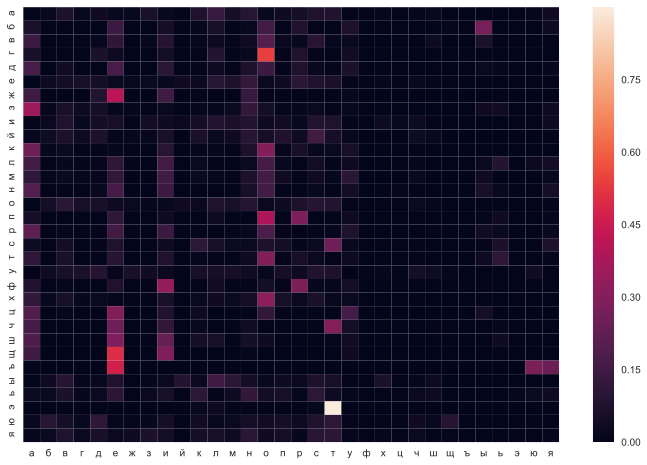

In [65]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS_RU = {l: i for i, l in enumerate(RUSSIAN)}

probabilities_ru = np.zeros((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(test[:-1], test[1:]):
    probabilities_ru[POS_RU[cp], POS_RU[cn]] += 1
    
probabilities_ru = (probabilities_ru / probabilities_ru.sum(axis=1)[:, None])

df_ru = pd.DataFrame(probabilities_ru, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

plt.figure(figsize=(12,8))
sns.heatmap(df_ru)
plt.show()

## Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р.

In [66]:
start = POS_RU['п']
end = POS_RU['р']
prior = 1. / len(RUSSIAN)
proba_sum = 0
for c in RUSSIAN:
    for l in RUSSIAN:
        proba = prior * probabilities_ru[start, POS_RU[c]] * probabilities_ru[POS_RU[c], POS_RU[l]] * probabilities_ru[POS_RU[l], end]
        if proba > 0:
            proba_sum += proba

In [67]:
print('Таким образом, вероятность равна: {:.4f} %'.format(proba_sum*100))

Таким образом, вероятность равна: 0.1334 %


### Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [10]:
s = []
start = "б"
s.append(start)
length = 8
for i in range(length):
    index = POS_RU[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities_ru[index])
    s.append(next_char)

print (''.join(s))

бкоснерид


## Выберите ряд (файл во вложении) и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [35]:
series = pd.read_csv('numbers-on-unemployment-benefits.csv')

In [36]:
series.columns = ['Month', 'Count']

In [37]:
series.head()

,Month,Count
0,1956-01,4742.0
1,1956-02,6128.0
2,1956-03,6494.0
3,1956-04,5379.0
4,1956-05,6011.0


In [38]:
series = series.dropna()

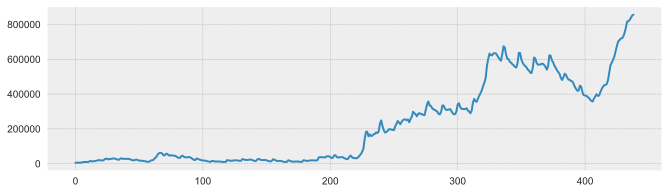

In [39]:
with plt.style.context('bmh'):
    plt.figure(figsize=(11, 3))
    plt.plot(series['Count'])

In [40]:
from hmmlearn import hmm

In [41]:
series = series['Count']

In [42]:
values = series.values.reshape(-1,1)

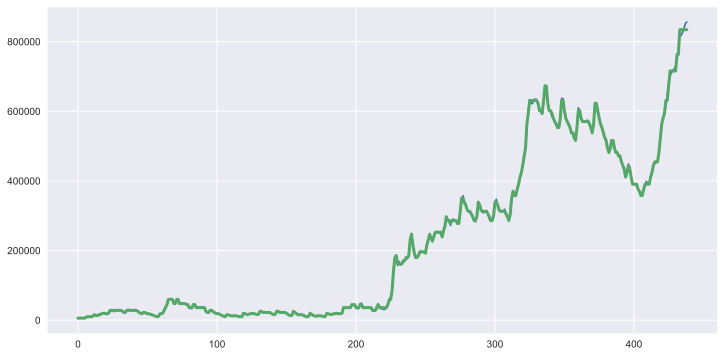

In [52]:
model = hmm.GaussianHMM(n_components=75,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

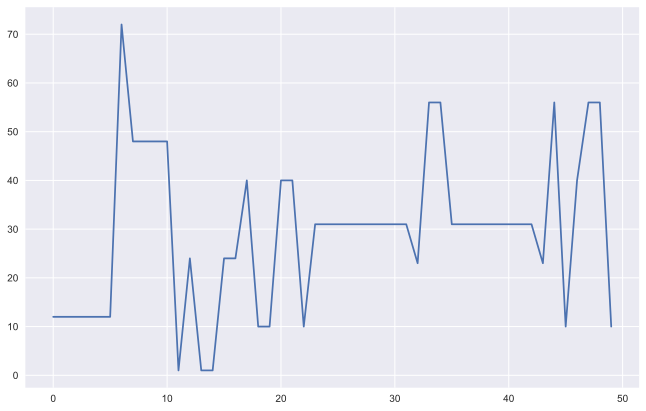

In [53]:
plt.figure(figsize=(11,7))
plt.plot(labels[:50])
plt.show()

In [54]:
cur_value = labels[-1]
predictions = []
for _ in range(10):
    cur_value = np.random.choice(75, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

In [55]:
new_series = np.concatenate((values, np.array(predictions)))

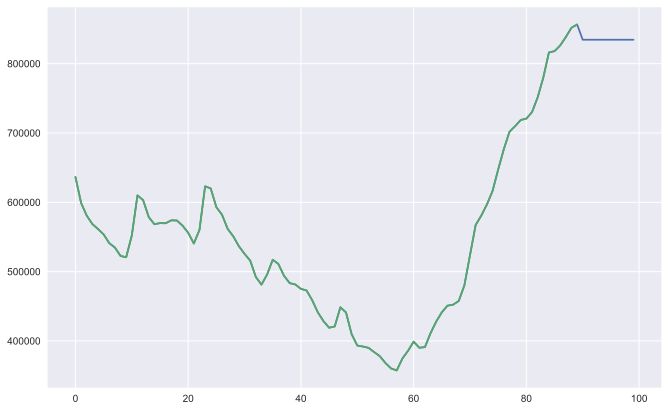

In [56]:
plt.figure(figsize=(11,7))
plt.plot(new_series[-100:])
plt.plot(values[-90:])
plt.show()

In [57]:
cur_value = labels[-11]
predictions = []
for _ in range(10):
    cur_value = np.random.choice(75, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

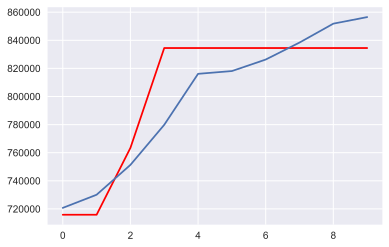

In [58]:
plt.plot(predictions, 'r-')
plt.plot(values[-10:])
plt.show()

## Таким образом, модель угадывает восходящих тренд реальных данных, но сами кривые заметно отличаются.